As with previous stages, I will be analyzing the state of New York and I will use linear and non-linear regression model for it. I will also compare trends for the 5 counties that have the most number of cases.

C:\Users\Owner\AppData\Local\Temp\ipykernel_50612\3061052826.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_york['total_cases'] = df_new_york[case_columns].iloc[:, -1]
C:\Users\Owner\AppData\Local\Temp\ipykernel_50612\3061052826.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new_york['total_deaths'] = df_new_york[death_columns].iloc[:, -1]


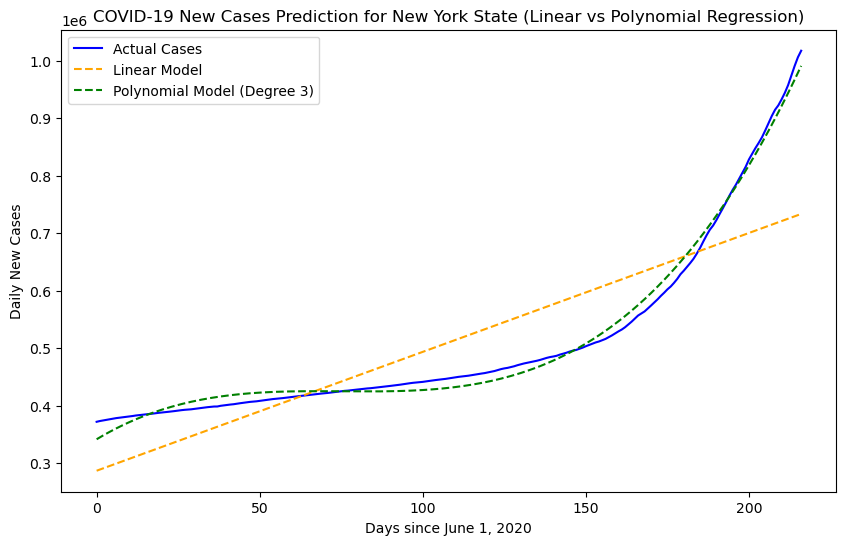

Linear RMSE (Cases): 82191.13
Polynomial RMSE (Cases): 13894.69


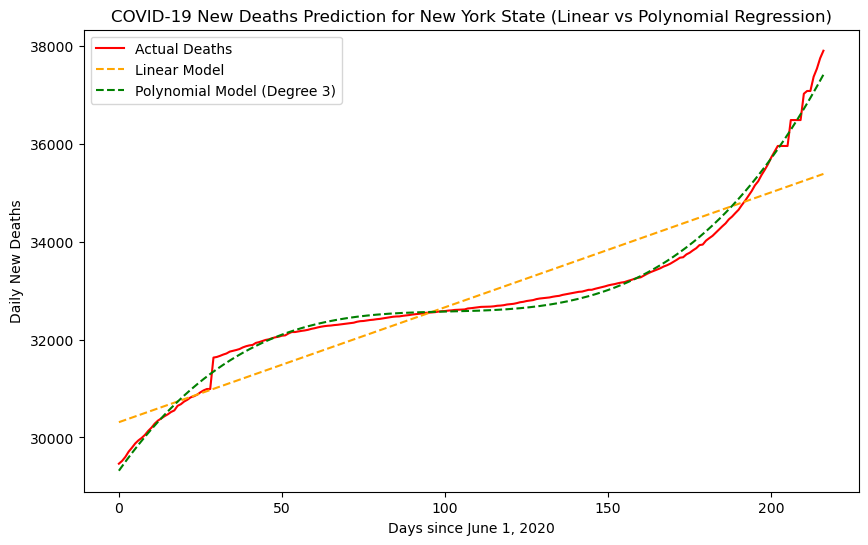

Linear RMSE (Deaths): 646.07
Polynomial RMSE (Deaths): 132.16 

Top 5 counties in New York: 
          County Name  total_cases  total_deaths
1868   Queens County        127743          7573
1851    Kings County        125655          7771
1879  Suffolk County        101233          2341
1857   Nassau County         92035          2420
1830    Bronx County         85646          5147


In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

df_united_states = pd.read_csv('US-Covid.csv')
df_new_york = df_united_states[df_united_states['State'] == 'NY']

case_columns = [col for col in df_new_york.columns if '_cases' in col]
death_columns = [col for col in df_new_york.columns if '_deaths' in col]

# Calculate the total cumulative number of cases and deaths for each county
df_new_york['total_cases'] = df_new_york[case_columns].iloc[:, -1]
df_new_york['total_deaths'] = df_new_york[death_columns].iloc[:, -1]

df_new_york.to_csv('df_new_york_with_total_cases_and_deaths.csv', index=False)

# --- Do the linear and polynomial RMSE for New York here ---

# Sum daily cases and deaths across all counties to get state-level data
state_cases = df_new_york[case_columns].sum()
state_deaths = df_new_york[death_columns].sum()

# Convert to numpy arrays for plotting and analysis
X = np.array(range(len(case_columns))).reshape(-1, 1)  # Days since start
y_cases = state_cases.values
y_deaths = state_deaths.values

# Linear Regression Model for Cases
linear_model_cases = LinearRegression()
linear_model_cases.fit(X, y_cases)
y_linear_pred_cases = linear_model_cases.predict(X)
linear_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_linear_pred_cases))

# Polynomial Regression Model (degree 3) for Cases
poly_features = PolynomialFeatures(degree=3)
X_poly = poly_features.fit_transform(X)
poly_model_cases = LinearRegression()
poly_model_cases.fit(X_poly, y_cases)
y_poly_pred_cases = poly_model_cases.predict(X_poly)
poly_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_poly_pred_cases))

# Linear Regression Model for Deaths
linear_model_deaths = LinearRegression()
linear_model_deaths.fit(X, y_deaths)
y_linear_pred_deaths = linear_model_deaths.predict(X)
linear_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_linear_pred_deaths))

# Polynomial Regression Model (degree 3) for Deaths
poly_model_deaths = LinearRegression()
poly_model_deaths.fit(X_poly, y_deaths)
y_poly_pred_deaths = poly_model_deaths.predict(X_poly)
poly_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_poly_pred_deaths))

# Plotting the RMSE results for Cases
plt.figure(figsize=(10, 6))
plt.plot(X, y_cases, color='blue', label='Actual Cases')
plt.plot(X, y_linear_pred_cases, color='orange', linestyle='--', label='Linear Model')
plt.plot(X, y_poly_pred_cases, color='green', linestyle='--', label='Polynomial Model (Degree 3)')
plt.xlabel('Days since June 1, 2020')
plt.ylabel('Daily New Cases')
plt.title('COVID-19 New Cases Prediction for New York State (Linear vs Polynomial Regression)')
plt.legend()
plt.show()
print(f'Linear RMSE (Cases): {linear_rmse_cases:.2f}')
print(f'Polynomial RMSE (Cases): {poly_rmse_cases:.2f}')

# Plotting the RMSE results for Deaths
plt.figure(figsize=(10, 6))
plt.plot(X, y_deaths, color='red', label='Actual Deaths')
plt.plot(X, y_linear_pred_deaths, color='orange', linestyle='--', label='Linear Model')
plt.plot(X, y_poly_pred_deaths, color='green', linestyle='--', label='Polynomial Model (Degree 3)')
plt.xlabel('Days since June 1, 2020')
plt.ylabel('Daily New Deaths')
plt.title('COVID-19 New Deaths Prediction for New York State (Linear vs Polynomial Regression)')
plt.legend()
plt.show()
print(f'Linear RMSE (Deaths): {linear_rmse_deaths:.2f}')
print(f'Polynomial RMSE (Deaths): {poly_rmse_deaths:.2f} \n')

# --- Continue with the rest of the code ---

# Sort the DataFrame by total cases in descending order and select the top 5 counties
top_5_counties = df_new_york.sort_values(by='total_cases', ascending=False).head(5)

#Show New York's top 5 counties (i.e. highest number of cases)
print("Top 5 counties in New York: ")
print(top_5_counties[['County Name', 'total_cases', 'total_deaths']])

As you can see, the top 5 counties with the highest number of cases in New York were Queens, Kings, Suffolk, Nassau, and Bronx. The next cell will show linear and polynomial RSME plots for these counties so taht they can be compared to the entire state.

Linear RMSE for Cases in Queens County : 255.11
Polynomial RMSE for Cases in Queens County : 128.54


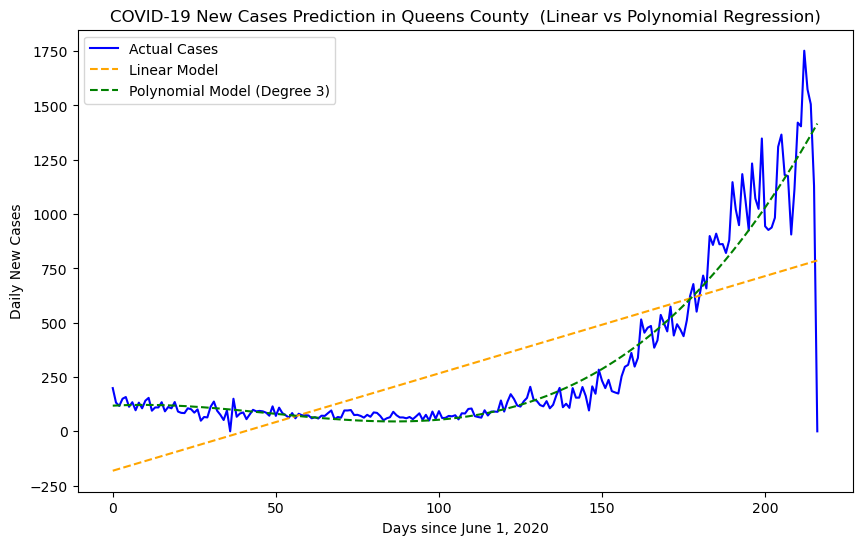

Linear RMSE for Deaths in Queens County : 30.59
Polynomial RMSE for Deaths in Queens County : 30.21


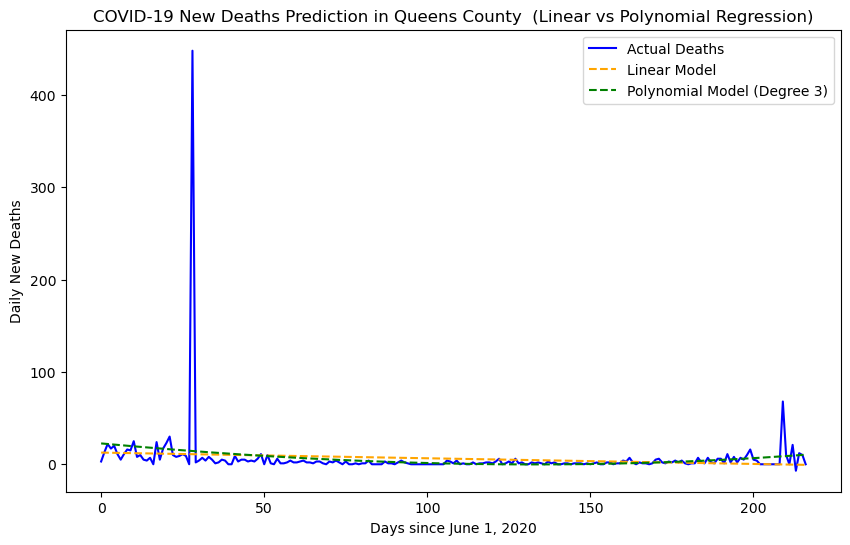

Linear RMSE for Cases in Kings County : 235.81
Polynomial RMSE for Cases in Kings County : 134.91


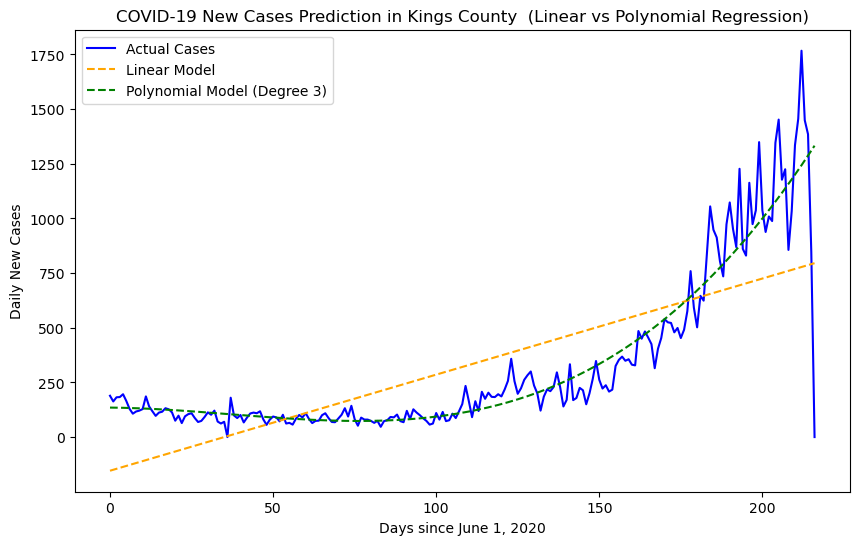

Linear RMSE for Deaths in Kings County : 8.08
Polynomial RMSE for Deaths in Kings County : 7.21


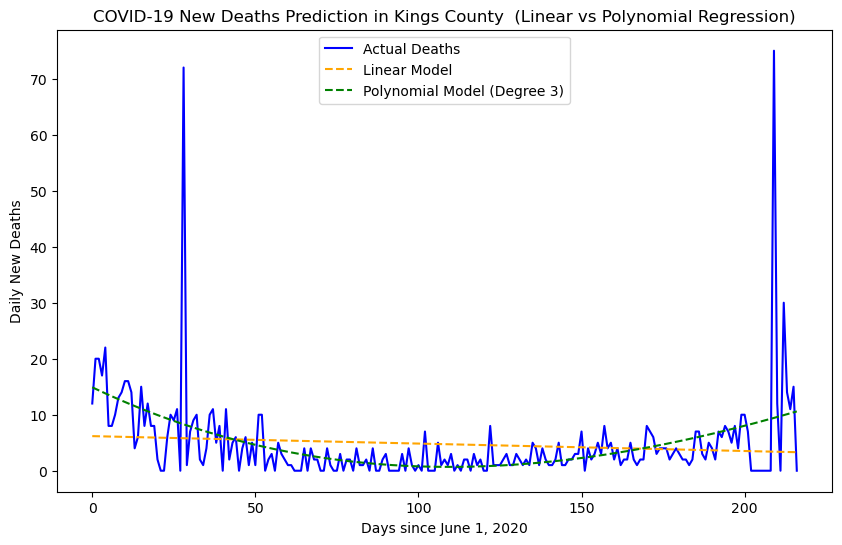

Linear RMSE for Cases in Suffolk County : 292.94
Polynomial RMSE for Cases in Suffolk County : 151.24


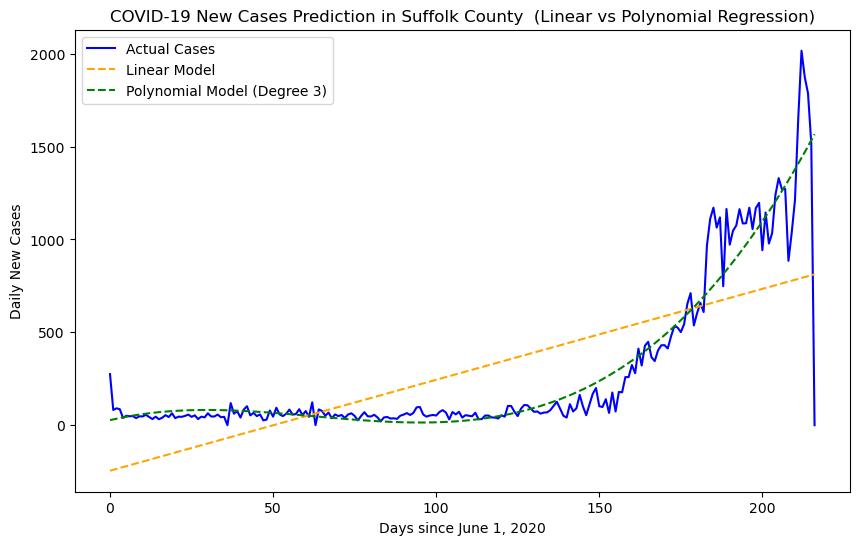

Linear RMSE for Deaths in Suffolk County : 5.32
Polynomial RMSE for Deaths in Suffolk County : 4.66


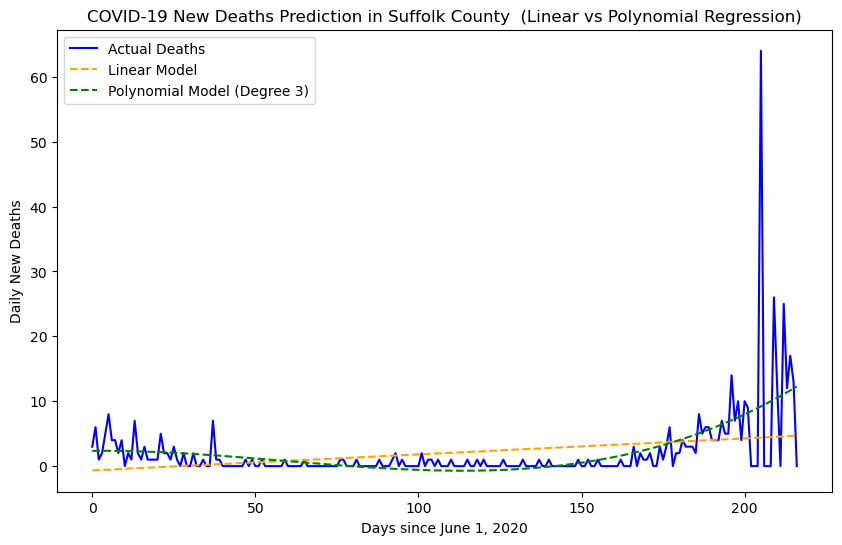

Linear RMSE for Cases in Nassau County : 218.67
Polynomial RMSE for Cases in Nassau County : 112.32


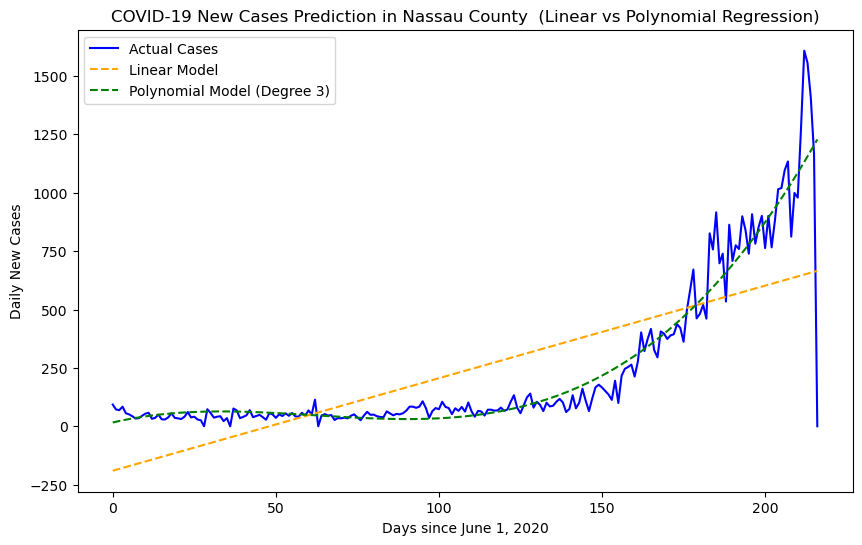

Linear RMSE for Deaths in Nassau County : 2.95
Polynomial RMSE for Deaths in Nassau County : 2.56


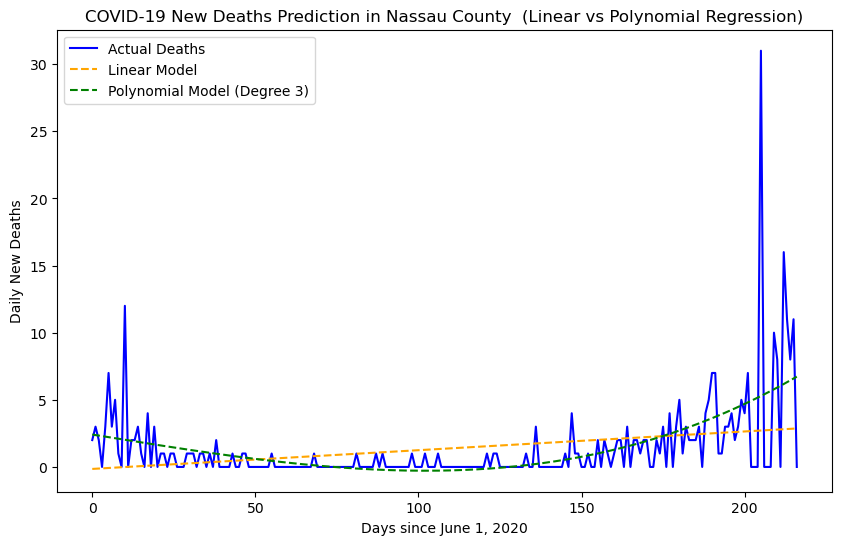

Linear RMSE for Cases in Bronx County : 151.97
Polynomial RMSE for Cases in Bronx County : 82.92


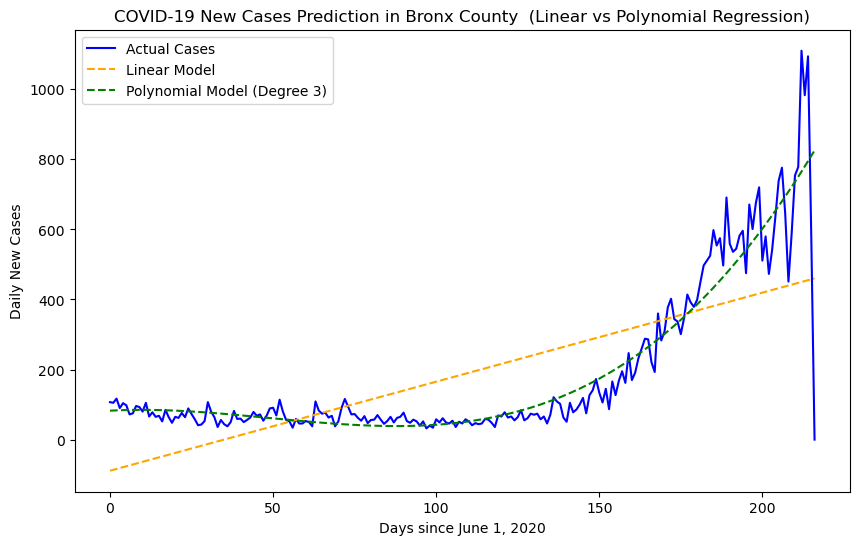

Linear RMSE for Deaths in Bronx County : 6.67
Polynomial RMSE for Deaths in Bronx County : 6.38


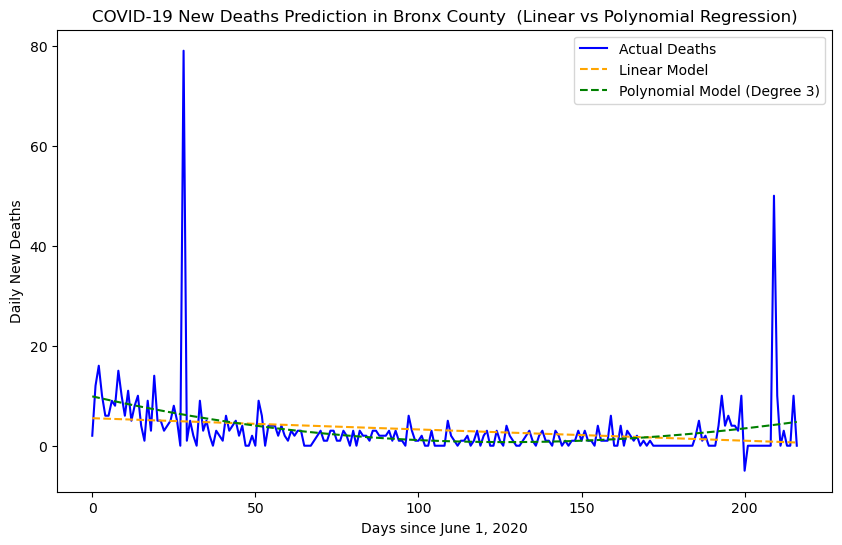

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
new_york = pd.read_csv('df_new_york_with_total_cases_and_deaths.csv')

# Get top 5 counties by total cases
top_counties = new_york.nlargest(5, 'total_cases')['County Name'].tolist()

# Filter the dataset for the top 5 counties
df_top_counties = new_york[new_york['County Name'].isin(top_counties)]

# Get the list of dates for analysis
case_columns = [col for col in df_top_counties.columns if '_cases' in col]
death_columns = [col for col in df_top_counties.columns if '_deaths' in col]

# Iterate over each top county to perform RMSE analysis
for county in top_counties:
    # Filter data for the current county
    county_data = df_top_counties[df_top_counties['County Name'] == county]
    
    # Get the number of new cases for each day
    X = np.array(range(len(case_columns) - 1)).reshape(-1, 1)  # Adjusted to match the length after np.diff
    y_cases = np.diff(county_data[case_columns].values.flatten())

    # Linear Regression Model for Cases
    linear_model_cases = LinearRegression()
    linear_model_cases.fit(X, y_cases)
    y_linear_pred_cases = linear_model_cases.predict(X)
    linear_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_linear_pred_cases))

    # Polynomial Regression Model (degree 3) for Cases
    poly_features_cases = PolynomialFeatures(degree=3)
    X_poly_cases = poly_features_cases.fit_transform(X)
    poly_model_cases = LinearRegression()
    poly_model_cases.fit(X_poly_cases, y_cases)
    y_poly_pred_cases = poly_model_cases.predict(X_poly_cases)
    poly_rmse_cases = np.sqrt(mean_squared_error(y_cases, y_poly_pred_cases))

    # Get the number of new deaths for each day
    y_deaths = np.diff(county_data[death_columns].values.flatten())

    # Linear Regression Model for Deaths
    linear_model_deaths = LinearRegression()
    linear_model_deaths.fit(X, y_deaths)
    y_linear_pred_deaths = linear_model_deaths.predict(X)
    linear_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_linear_pred_deaths))

    # Polynomial Regression Model (degree 3) for Deaths
    poly_features_deaths = PolynomialFeatures(degree=3)
    X_poly_deaths = poly_features_deaths.fit_transform(X)
    poly_model_deaths = LinearRegression()
    poly_model_deaths.fit(X_poly_deaths, y_deaths)
    y_poly_pred_deaths = poly_model_deaths.predict(X_poly_deaths)
    poly_rmse_deaths = np.sqrt(mean_squared_error(y_deaths, y_poly_pred_deaths))

    # Plotting the RMSE results for Cases
    plt.figure(figsize=(10, 6))
    plt.plot(X, y_cases, color='blue', label='Actual Cases')
    plt.plot(X, y_linear_pred_cases, color='orange', linestyle='--', label='Linear Model')
    plt.plot(X, y_poly_pred_cases, color='green', linestyle='--', label='Polynomial Model (Degree 3)')
    plt.xlabel('Days since June 1, 2020')
    plt.ylabel('Daily New Cases')
    plt.title(f'COVID-19 New Cases Prediction in {county} (Linear vs Polynomial Regression)')
    plt.legend()
    print(f"Linear RMSE for Cases in {county}: {linear_rmse_cases:.2f}")
    print(f"Polynomial RMSE for Cases in {county}: {poly_rmse_cases:.2f}")
    plt.show()

    # Plotting the RMSE results for Deaths
    plt.figure(figsize=(10, 6))
    plt.plot(X, y_deaths, color='blue', label='Actual Deaths')
    plt.plot(X, y_linear_pred_deaths, color='orange', linestyle='--', label='Linear Model')
    plt.plot(X, y_poly_pred_deaths, color='green', linestyle='--', label='Polynomial Model (Degree 3)')
    plt.xlabel('Days since June 1, 2020')
    plt.ylabel('Daily New Deaths')
    plt.title(f'COVID-19 New Deaths Prediction in {county} (Linear vs Polynomial Regression)')
    plt.legend()
    print(f"Linear RMSE for Deaths in {county}: {linear_rmse_deaths:.2f}")
    print(f"Polynomial RMSE for Deaths in {county}: {poly_rmse_deaths:.2f}")
    plt.show()
